# <b>KDD WeFive_HighFive (Group 1)

<b>Group 1:
<p>Akhil Chundarthil (801137901)
<p>Akhila Vemana (801149644)
<p>Keerthi Reddy Kandi (801149971)
<p>Akshara Gone (801136090)
<p>Koushik Koritala (801135486)

# Github Link : https://github.com/kddprojectgroup1/kdd-project-group_1

# Project Title: Mining and Modeling NYC Airbnb Data.

The project focuses on analyzing NYC Airbnb to predict the ratings of Airbnb based on their location, price range, guests experience (reviews) and other related features. As Airbnb moves towards becoming an end-to-end travel platform, it is increasingly important for us to deliver travel insights that help people in making decisions about their trips. To scale our ability to answer queries, we needed a systematic approach for serving high-quality information about entities (e.g. ratings, cities, landmarks, events, etc.) and the relationships between them (e.g. the most popular landmark in a city for a reasonable price, the best neighbourhood to stay, etc.)
<br> Our project will accomplish this, following the CRISP-DM process in each phase. We finally achieve useful insights from the observations done in this project.

# Dataset

Dataset Link: https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data/kernels 

The dataset has the following attributes :

* id
* name
* host_id
* host_name
* neighbourhood_group
* neighbourhood
* latitude
* longitude
* room_type
* price
* minimum_nights
* number_of_reviews
* last_review
* reviews_per_month
* calculated_host_listings_count
* availability_365
* RATINGS ( 1-5 : 1- Lowest, 5- Highest ).This column is not included in dataset, this target variable is added during the data preparation phase.


# Data Preprocessing and Data Preparation

## Importing Libraries

First step before we proceed to our analysis is importing the necessary libraries. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

## Reading Dataset

Next, we import the dataset of new york city Air BnB by using pandas "read_csv" function and storing in variable 'ds'.

In [3]:
ds=pd.read_csv("AB_NYC_2019.csv")

## Checking Data Types

Checking the data types of the columns present in dataset. This data type object (dtype) informs us about the layout of the array. Type of the data may be integer, float, Python object etc.

In [87]:
ds.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

## Summary of Data set

Checking the data types of the columns present in dataset. Info generally prints a concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.

In [6]:
ds.info

<bound method DataFrame.info of              id                                               name    host_id  \
0          2539                 Clean & quiet apt home by the park       2787   
1          2595                              Skylit Midtown Castle       2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !       4632   
3          3831                    Cozy Entire Floor of Brownstone       4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park       7192   
5          5099          Large Cozy 1 BR Apartment In Midtown East       7322   
6          5121                                    BlissArtsSpace!       7356   
7          5178                   Large Furnished Room Near B'way        8967   
8          5203                 Cozy Clean Guest Room - Family Apt       7490   
9          5238                 Cute & Cozy Lower East Side 1 bdrm       7549   
10         5295                   Beautiful 1br on Upper West Side       7702

## Dimensionality

Shape returns a tuple representing the dimensionality of the DataFrame.It Finds the  number of rows and columns of dataset.

In [89]:
ds.shape

(48895, 16)

## Null Values

Null values affects the observations made by being biased. It is important to check if the dataset has null values and performing the data cleaning to handle such null values. isnull is used here to check null values in all columns of data set. 

In [90]:
ds.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

## Removing irrelavant features

We drop the columns 'id', 'last_review' as they are not significant for our future data exploration and predictions. Drop function specified labels from rows or columns

In [91]:
ds.drop(['id','last_review'], axis=1, inplace=True)

We drop 'availability_365' rows with value "0" as it indicates that AirBnB is not open on any day in a year which cannot be the case because based on our domain knowledge an AirBnB will be open for atleast one day.

In [92]:
ds.drop(ds[ds['availability_365']==0].index,inplace=True)

## Handling Missing Values

Filling the 'reviews_per_month' column missing values with "0" because we cannot predict the count of reviews made by guest as it varies time to time. And filling with '0' is considerable as it is more realistic than filling with random values or other methods like mode, median, mean.

In [93]:
ds.fillna({'reviews_per_month':0}, inplace=True)

## Feature Scaling

We are feature scaling the 'reviews_per_month' column values by converting it to integer and multiplying the column values with 30 and then rounded it to nearest integer as the values prior were of type float which generally is not the case because reviews by guests will be positive integers.

In [94]:
ds['reviews_per_month']=ds['reviews_per_month']*30

In [95]:
round(ds['reviews_per_month']).head(5)

0      6.0
1     11.0
2      0.0
3    139.0
5     18.0
Name: reviews_per_month, dtype: float64

## Converting Data Types

From the output of "info" function, we saw that some of the columns in our dataset seems to be misleading in a wrong way. So, changing data types of those columns from object type to relevant types.

In [96]:
ds['neighbourhood']=ds['neighbourhood'].astype('category')
ds['neighbourhood_group']=ds['neighbourhood_group'].astype('category')
ds['room_type']=ds['room_type'].astype('category')
ds['reviews_per_month']=ds['reviews_per_month'].astype('int')

## Dataset Description

Finding the structure of dataset. Describe function prints the structure of only numeric columns in the dataset by excluding the other different types of columns.

In [97]:
ds.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.136200e+04,31362.000000,31362.000000,31362.000000,31362.000000,31362.000000,31362.000000,31362.000000,31362.000000
mean,8.144950e+07,40.728401,-73.948745,162.050475,8.338658,31.852369,44.928544,10.334067,175.831994
std,8.673088e+07,0.056561,0.051397,254.425463,23.836703,51.636804,53.385321,40.700398,126.187636
min,2.571000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,8.620116e+06,40.688383,-73.983270,70.000000,2.000000,2.000000,5.000000,1.000000,55.000000
50%,4.109561e+07,40.723720,-73.954110,111.500000,3.000000,10.000000,27.000000,1.000000,168.000000
75%,1.452145e+08,40.763030,-73.930132,189.000000,5.000000,39.000000,70.000000,3.000000,305.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,1755.000000,327.000000,365.000000


## Handling Outliers

Removing the Outliers after finding the five point summary of the respective attributes. After performing the five point summary, we got the range of outliers and dropped them by using "drop" function.

In [98]:
ds= ds.drop(ds[(ds['minimum_nights']>365)].index)
ds= ds.drop(ds[(ds['number_of_reviews']>500)].index)
ds= ds.drop(ds[(ds['calculated_host_listings_count']>100)].index)
ds= ds.drop(ds[(ds['price']>1800)].index)
ds= ds.drop(ds[(ds['price']<1)].index)
ds= ds.drop(ds[(ds['reviews_per_month']>168)].index)

<b>As exploration of data is done till now, we now derived new "rating" column based on neighbourhood_group(location), price range and their availability in a year from the available columns in dataset. We categorized Brooklyn and Manhattan to one category and Queens,Staten Island, Bronx to other category for deriving the rating of available AirBnBs in these neighbourhood_groups because, the locations are near Manhattan and Brooklyn are costly areas in New York City, and the ratings of Airbnb varies compared to other locations which are rural like Bronx. So, AirBnBs in Bronx area should have low price range but with better facilities.

In [99]:
ds['rating']=1
for i in range(len(ds)):
    if((str(ds.iloc[i,3]) in ['Manhattan','Brooklyn'])):
        if((ds.iloc[i,8]<100) and (ds.iloc[i,13]>200)):
            ds.iloc[i,14]=5
        elif((ds.iloc[i,8]<500) and (ds.iloc[i,13]>100)):
            ds.iloc[i,14]=4
        elif(ds.iloc[i,8] in range(500,1000) and (ds.iloc[i,13]in range(30,250))):
            ds.iloc[i,14]=3
        elif((ds.iloc[i,8] in range(1000,3000)) and (ds.iloc[i,13] in range(10,150))):
            ds.iloc[i,14]=2
    elif((str(ds.iloc[i,3]) in ['Queens','Staten Island','Bronx'])):
        if((ds.iloc[i,8] in range(850,2000)) and (ds.iloc[i,13] < 150)):
            ds.iloc[i,14]=2
        elif((ds.iloc[i,8] in range(500,850)) and (ds.iloc[i,13] < 250)) :
            ds.iloc[i,14]=3
        elif((ds.iloc[i,8] in range(150,500)) and (ds.iloc[i,13] < 300)) :
            ds.iloc[i,14]= 4
        elif((ds.iloc[i,8]<150) and (ds.iloc[i,13] in range(200,365))):
            ds.iloc[i,14]=5

# Data Visualization

<b>Plotting the most repeated words in name column as an image using WordCloud and STOPWORDS packages in python.
Installed the packages 'conda install -c conda-forge wordcloud and conda install stop-words'

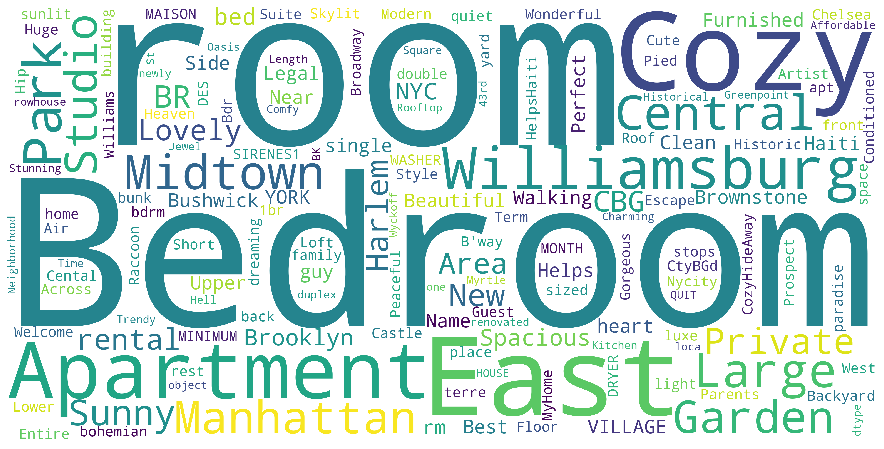

In [100]:
name_corpus = ''.join(str(ds['name']))
name_wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'white', height = 2000, width = 4000).generate(name_corpus)
plt.figure(figsize = (16,8))
plt.imshow(name_wordcloud)
plt.axis('off')
plt.show()

## Observation

The output above shows the most frequent number of words in listings "name" column which are including: Bedroom, room, cozy, Midtown, williamsburg etc. There are some words which specifically tell about AirBnb desription like: Large, East, Private, cozy, living room, sunny, etc . These are typical words for hosts when describing their listings.

<b>Marking the scatter plot for the neighborhood groups in New York City.

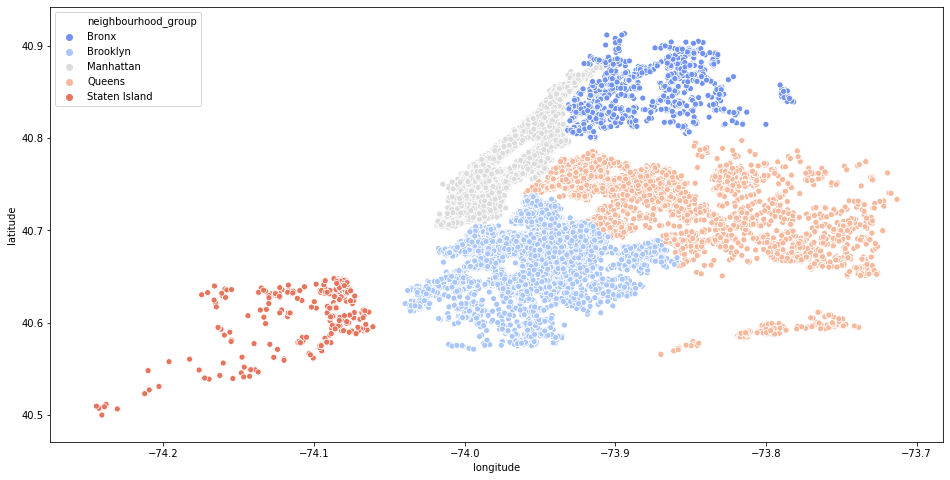

In [101]:
f,ax = plt.subplots(figsize=(16,8))
ax = sns.scatterplot(y=ds.latitude,x=ds.longitude,hue=ds.neighbourhood_group,palette="coolwarm")
plt.show()

## Observation

The output above shows the 5 regions in New York city map and the spread of AirBnb's in those locations.

<b>Count plot for neighbourhood_group. 

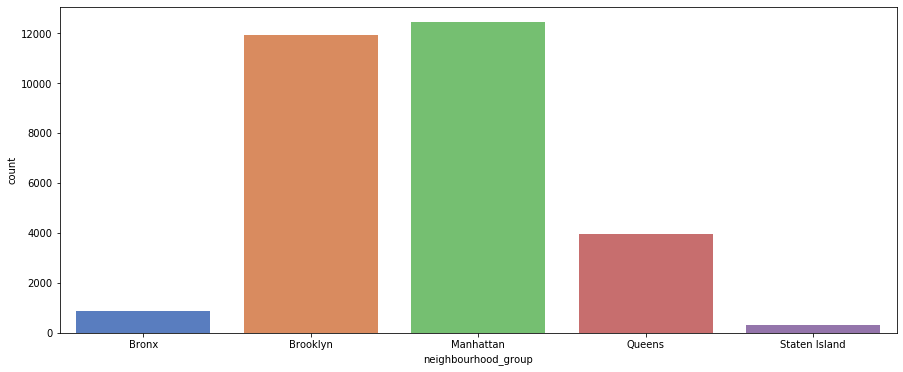

In [102]:
f,ax = plt.subplots(figsize=(15,6))
ax = sns.countplot(ds.neighbourhood_group,palette="muted")
plt.show()

## Observation

From the output above we can observe that Brooklyn and Manhattan have comparitively more number of AirBnB's in New York City and are quite popular .

<b>Visualizing pie plot to find the percentange of different types of rooms available in AirBnB's.

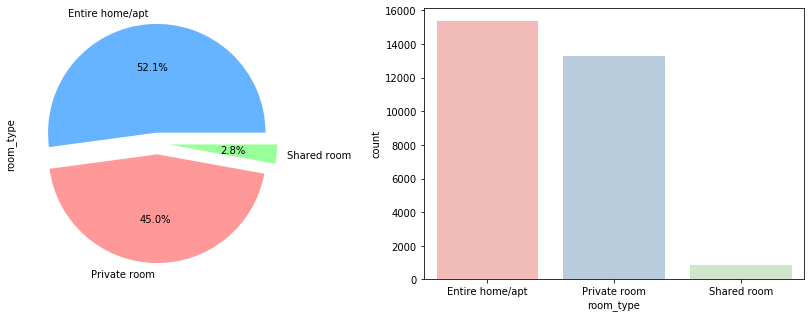

In [103]:
f,ax = plt.subplots(1,2,figsize=(15,5))
ds.room_type.value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',ax=ax[0],colors = ['#66b3ff','#ff9999','#99ff99'])
ax = sns.countplot(ds.room_type,palette="Pastel1")
plt.show()

## Observation

From the above output we can observe that the 'Entire home/apt' type are more in number which means guest prefer to have it entirely for themselves for their trips to feel like a home and can live like a family together.

<b>Bar plot representing the price for each neighbourhood_group

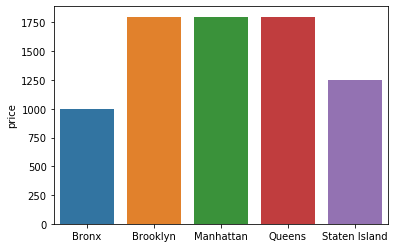

In [104]:
sns.barplot(ds["neighbourhood_group"].cat.categories, ds.groupby('neighbourhood_group')['price'].max())

## Observation 

From the above output we can observe that the prices for groups Brooklyn,Manhattan and Queens are higher compared to other 2 groups( Bronx, Staten Island).

<b>Violin plot to find the rating for each neighbourhood_group. 

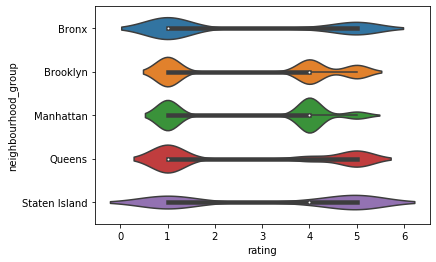

In [105]:
ax = sns.violinplot(x="rating", y="neighbourhood_group", data=ds)

## Observation 

Rating column derived from features - price,availability_365 and neighbourhood_group. We can observe  that the rating for Brooklyn and Manhattan has atleast rating 1 when compared to other groups.

# Machine Learning Phase (Outline)

For modeling, based on the dataset we use:

1. Classification: Naive Bayes(NB) 
<br>-To predict the probability of guests choosing the Airbnb given its location, price, ratings.
<br>-  A naive Bayes classifier considers each of the features independently to find the probability. Given Price, reviews, listings, availabiltiy naive bayes predicts the proobability of the location based on these features.
<p>
2. Clustering: K-Means 
<br>- To know about which locations in NYC are popular for Airbnb's considering price, ratings.
<br>- k-means clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean.
<br>- We cluster Airbnb's depending on the location and find useful insights by comparing them within region which is useful for guests to choose given an region.
  <p>
3. Regression: Linear regression(TF-IDF)
<br>- To recommend Airbnb to guests by training and testing, considering the features chosen.
<br>- Training and testing data will be done by splitting the data in a ratio split and then perform the linear regression technique on both the data. 
<br>- Linear Regression is choosen because in our dataset we have more number of numerical columns and check for data behaviour. Also we will calculate Root mean square error to understand the data behaviour.
<p>
For the performance evaluation, based on the modeling is done we use the metrics ROC curve, AUC value, and Confusion matrix.


## Conclusion

We achieve useful insights from the model built based on pre-defined objectives. Our model will suggest guests in choosing suitable AirBnb for their trip in New York City considering their requirements( Budget, location, Ambience etc.. )